# Unit 5 - Financial Planning


In [44]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import numpy as np
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import io

%matplotlib inline

In [45]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [46]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [47]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
response_btc_url = requests.get(btc_url)
response_eth_url = requests.get(eth_url)

In [48]:
response_btc = response_btc_url.json()
response_eth = response_eth_url.json()

In [49]:
# Fetch current BTC price
current_btc_price = response_btc['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
current_eth_price = response_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57094.80
The current value of your 5.3 ETH is $20125.85


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [50]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [51]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET")
# Create the Alpaca API object
alpaca_trade = tradeapi.REST(alpaca_api_key,alpaca_secret_key)
type(alpaca_api_key)

str

In [52]:
# Format current date as ISO format
start = pd.Timestamp("2021-05-14", tz= 'US/Pacific').isoformat()
end = pd.Timestamp("2021-05-14", tz= 'US/Pacific').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
agg_df = alpaca_trade.get_barset(tickers, timeframe, start=start, end=end).df
spy_df = alpaca_trade.get_barset(tickers, timeframe, start=start, end=end).df
# Preview DataFrame
agg_df
spy_df

AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.28  3711363  413.2   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-14 00:00:00-04:00  417.49  413.18  416.53  69012933

In [53]:
# Pick AGG and SPY close prices
agg_close_price =agg_df["AGG"]["close"][-1]
spy_close_price =spy_df["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [54]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20826.50
The current value of your 200 AGG shares is $22856.00


### Savings Health Analysis

In [55]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(data=[16405.628, 40616.5],index=['crypto', 'shares'], columns=['amount'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,16405.628
shares,40616.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

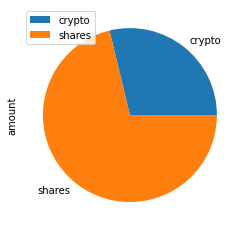

In [56]:
# Plot savings pie chart
df_savings.plot(subplots=True,kind="pie")

In [58]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = np.random.randint(35000,37000,size=1)
cover_amount = emergency_fund - total_savings
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
else:
    total_savings < emergency_fund
    print(f"You are currently ${cover_amount} away from reaching your goal. ")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [59]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [60]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY","AGG"]

df_stock_data =alpaca_trade.get_barset(tickers, timeframe, start= start_date,end= end_date, limit=1000 ).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [61]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirtyyear = MCSimulation(df_stock_data,[0.6,0.4], 500, 252*30)

In [62]:
# Printing the simulation input data
mc_thirtyyear.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998609,1.006634,0.999142,0.998237,0.997829,1.002115,1.000272,0.993397,0.998407,0.996055,...,0.999152,1.005826,1.001341,1.005681,0.989632,0.992670,0.995688,0.989994,1.016362,1.007519
2,1.000219,1.008005,0.995230,1.004862,1.001936,1.010872,0.998831,0.995213,1.004685,0.999212,...,0.994899,1.001699,1.004188,1.012356,0.985777,0.987100,1.001887,0.993734,1.013047,1.011679
3,0.999094,1.008750,1.003054,1.004083,1.010483,1.008340,0.997006,1.000969,1.012503,1.004493,...,0.997545,0.999091,1.001337,1.011570,0.990663,0.985175,1.002797,0.995836,1.004541,1.007709
4,1.008613,1.011727,1.011478,1.008427,1.020929,1.014660,0.985939,0.996484,1.012617,0.996733,...,0.992257,0.985468,1.002126,1.007598,0.996962,0.981950,0.996412,0.989692,1.001621,1.010057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.588148,3.687961,2.095361,1.570736,9.745772,5.221733,7.789227,7.136625,3.265143,5.522713,...,3.057696,3.686699,19.368420,14.801409,7.504553,5.757865,3.005855,3.449545,9.338315,7.828097
7557,10.645599,3.707416,2.107813,1.556844,9.796984,5.231405,7.727335,7.083890,3.322783,5.534603,...,3.057429,3.715225,19.384035,14.736448,7.486423,5.804604,2.992467,3.451311,9.339037,7.801147
7558,10.648417,3.693073,2.113541,1.558321,9.718228,5.262788,7.712205,7.071362,3.307800,5.555749,...,3.062294,3.739326,19.099482,14.706985,7.442700,5.779546,2.997056,3.449739,9.241505,7.749489
7559,10.671823,3.700611,2.120995,1.555528,9.731268,5.228751,7.705032,7.078904,3.313631,5.515376,...,3.068208,3.735487,19.227718,14.537663,7.463094,5.799851,2.991815,3.473518,9.241874,7.750666


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

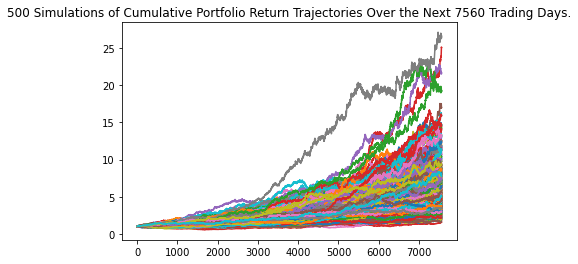

In [39]:
# Plot simulation outcomes
mc_thirtyyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

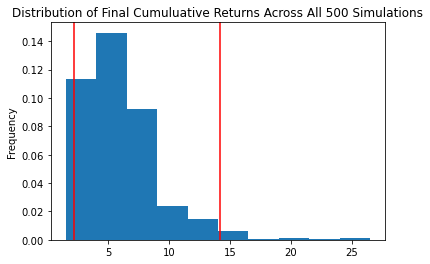

In [40]:
# Plot probability distribution and confidence intervals
mc_thirtyyear.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
mcsummary_statistics = mc_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(mcsummary_statistics)

count           500.000000
mean              6.071563
std               3.240418
min               1.542790
25%               3.854691
50%               5.264073
75%               7.571940
max              26.483551
95% CI Lower      2.213340
95% CI Upper     14.155513
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [63]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = mc_thirtyyear.summarize_cumulative_return()[8]
ci_upper = mc_thirtyyear.summarize_cumulative_return()[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [82]:
# Set initial investment
initial_investment = 30000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = mc_thirtyyear.summarize_cumulative_return()[8] * 1.5
ci_upper = mc_thirtyyear.summarize_cumulative_return()[9] * 1.5

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $45000.0 in the portfolio over the next 30 years will end within in the range of $3.131512364099801 and $20.76759573175864


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_fiveyear = MCSimulation(df_stock_data,[0.85,0.15], 500, 252*5)

In [66]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
print(mc_fiveyear)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

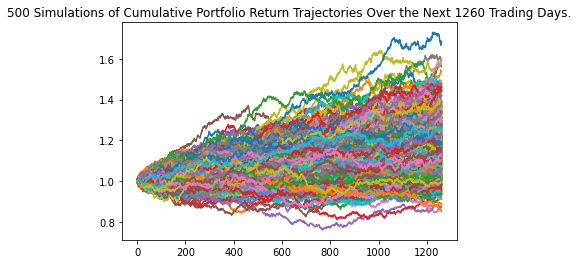

In [68]:
# Plot simulation outcomes
mc_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

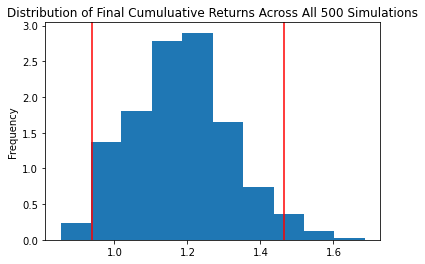

In [77]:
# Plot probability distribution and confidence intervals
mc_fiveyear.plot_distribution()

In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
mcsummary_statistics_fiveyear = mc_fiveyear.summarize_cumulative_return()

# Print summary statistics
mcsummary_statistics_fiveyear

count           500.000000
mean              1.180589
std               0.136413
min               0.852041
25%               1.083563
50%               1.181247
75%               1.267830
max               1.686310
95% CI Lower      0.939013
95% CI Upper      1.465636
Name: 1260, dtype: float64

In [83]:
# Set initial investment
initial_investment2 = 60000 * 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = mc_fiveyear.summarize_cumulative_return()[8] * 1.5
ci_upper_five = mc_fiveyear.summarize_cumulative_return()[9] * 1.5

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $45000.0 in the portfolio over the next 5 years will end within in the range of $1.4085196838607807 and $2.1984546466976713


### Ten Years Retirement Option

In [74]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_tenyear = MCSimulation(df_stock_data,[0.6,0.4], 500, 252*10)

In [75]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
print(mc_tenyear)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

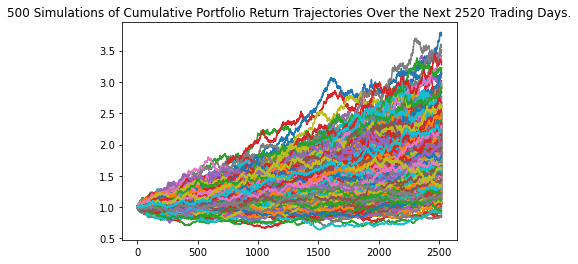

In [76]:
# Plot simulation outcomes
mc_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

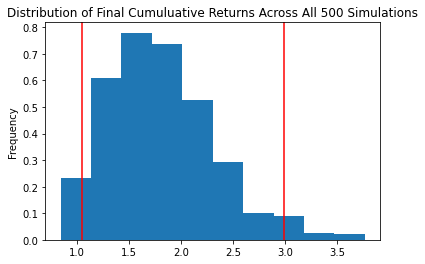

In [78]:
# Plot probability distribution and confidence intervals
mc_tenyear.plot_distribution()

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_tenyear_return = mc_tenyear.summarize_cumulative_return()
# Print summary statistics
print(mc_tenyear_return)

count           500.000000
mean              1.807434
std               0.507042
min               0.840080
25%               1.429837
50%               1.753927
75%               2.125554
max               3.764459
95% CI Lower      1.051078
95% CI Upper      2.984564
Name: 2520, dtype: float64


In [84]:
# Set initial investment
initial_investment = 60000 * 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = mc_fiveyear.summarize_cumulative_return()[8] * 1.5
ci_upper_ten = mc_fiveyear.summarize_cumulative_return()[9] * 1.5
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $90000.0 in the portfolio over the next 10 years will end within in the range of $1.4085196838607807 and $2.1984546466976713
